In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from dataset import PolarisPublicationData

In [2]:
data = PolarisPublicationData()

In [3]:
all_data = data.load_data(figure='S9')
merfish_df = all_data['Petukhov et al.']
merfish_df2 = all_data['Liu et al.']
seqfish_df = all_data['seqFISH']

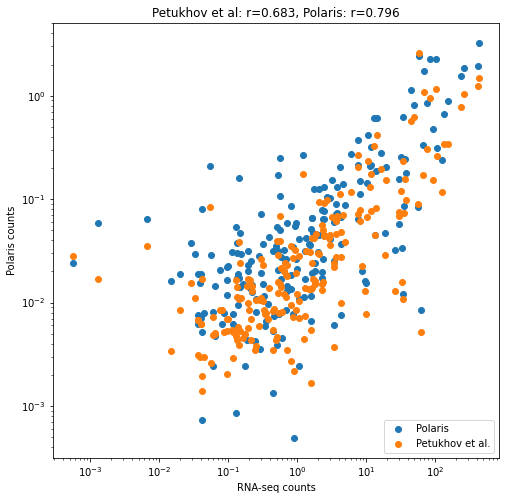

In [4]:
x = merfish_df['RNA seq']
y1 = merfish_df['Petukhov et al.']
y2 = merfish_df['Polaris']

plt.figure(figsize=(8,8))
  
plt.scatter(x,y2, label='Polaris')
plt.scatter(x,y1, label='Petukhov et al.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('RNA-seq counts')
plt.ylabel('Polaris counts')
plt.title('Petukhov et al: r=%.3f, Polaris: r=%.3f'%(pearsonr(x,y1)[0], pearsonr(x,y2)[0]))
plt.legend(loc='lower right')
plt.show()

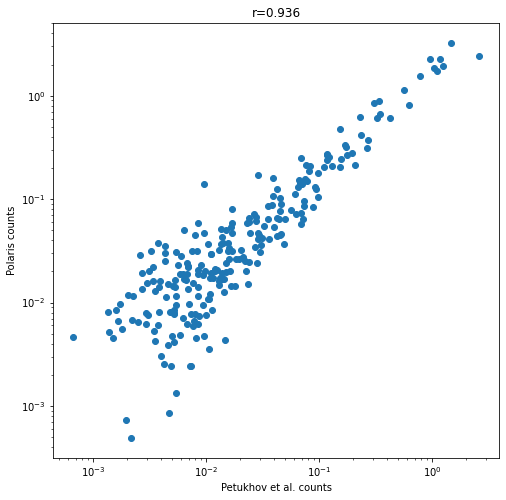

In [5]:
x = merfish_df['Petukhov et al.']
y = merfish_df['Polaris']

plt.figure(figsize=(8,8))

plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Petukhov et al. counts')
plt.ylabel('Polaris counts')
plt.title('r=%.3f'%(pearsonr(x,y)[0]))
plt.show()

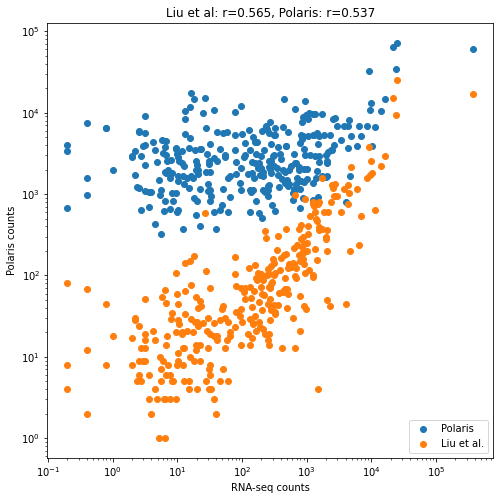

In [6]:
x = merfish_df2['RNA seq']
y1 = merfish_df2['Liu et al.']
y2 = merfish_df2['Polaris']

plt.figure(figsize=(8,8))
  
plt.scatter(x,y2, label='Polaris')
plt.scatter(x,y1, label='Liu et al.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('RNA-seq counts')
plt.ylabel('Polaris counts')
plt.title('Liu et al: r=%.3f, Polaris: r=%.3f'%(pearsonr(x,y1)[0], pearsonr(x,y2)[0]))
plt.legend(loc='lower right')
plt.show()

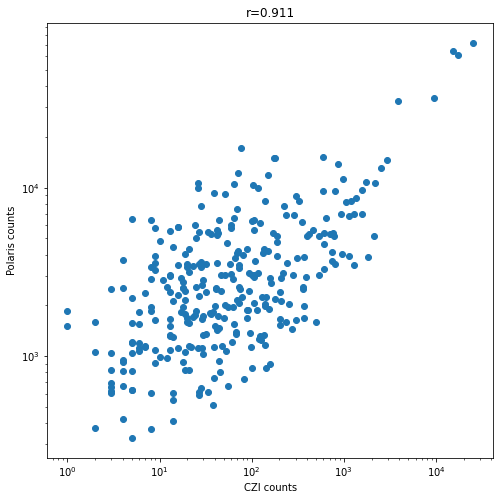

In [7]:
x = merfish_df2['Liu et al.']
y = merfish_df2['Polaris']

plt.figure(figsize=(8,8))

plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('CZI counts')
plt.ylabel('Polaris counts')
plt.title('r=%.3f'%(pearsonr(x,y)[0]))
plt.show()

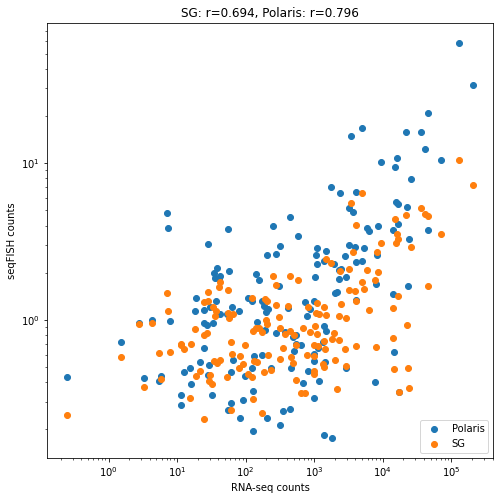

In [8]:
x = seqfish_df['RNA seq']
y1 = seqfish_df['SG']
y2 = seqfish_df['Polaris']

plt.figure(figsize=(8,8))
  
plt.scatter(x,y2, label='Polaris')
plt.scatter(x,y1, label='SG')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('RNA-seq counts')
plt.ylabel('seqFISH counts')
plt.title('SG: r=%.3f, Polaris: r=%.3f'%(pearsonr(x,y1)[0], pearsonr(x,y2)[0]))
plt.legend(loc='lower right')
plt.show()

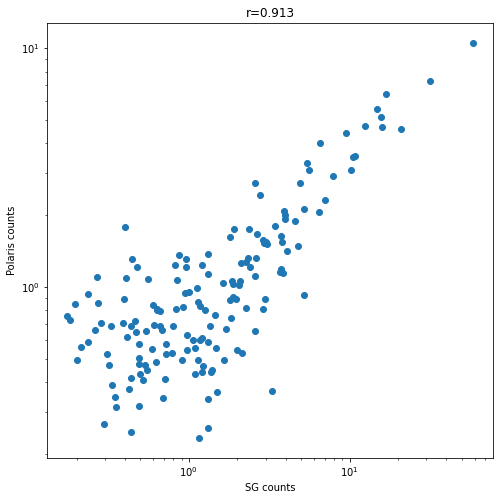

In [9]:
x = seqfish_df['SG']
y = seqfish_df['Polaris']

plt.figure(figsize=(8,8))

plt.scatter(y,x)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('SG counts')
plt.ylabel('Polaris counts')
plt.title('r=%.3f'%(pearsonr(x,y)[0]))
plt.show()